<a href="https://colab.research.google.com/github/mmstfkc/Deep-Learning/blob/main/CNN_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CİFAR 10 datasetinde Evrişimli Sinir Ağı (CNN) başlangıcı

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

CIFAR10 veri setini indirin ve hazırlayın

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

veri setimizdeki 25 fotoğrafı görüntüleyelim <br>
Ardından alt kısımlarına ne olduklarını yazalım



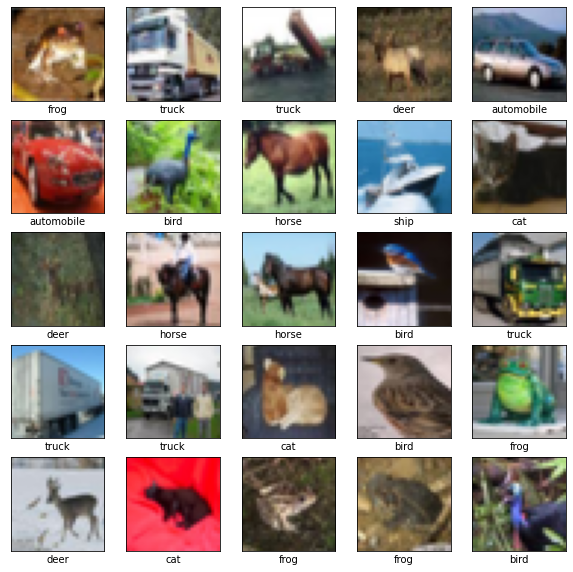

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

MOdeli olusturmaaya başlayalım

In [19]:
model = models.Sequential()

şimdi de katmanları oluşturmaya başlayalım

Con2d iki boyutlu dizilerde diziyi sıkıştırmak daha küçük boyutlara getirmek için kullanılıyor
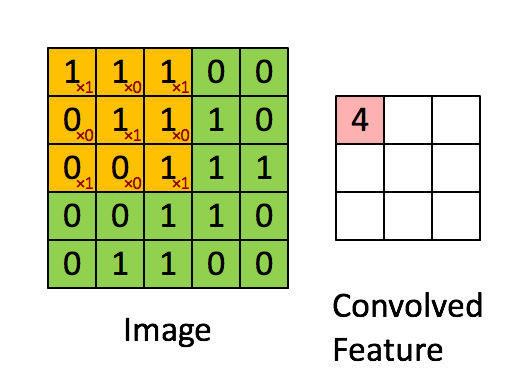

In [20]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

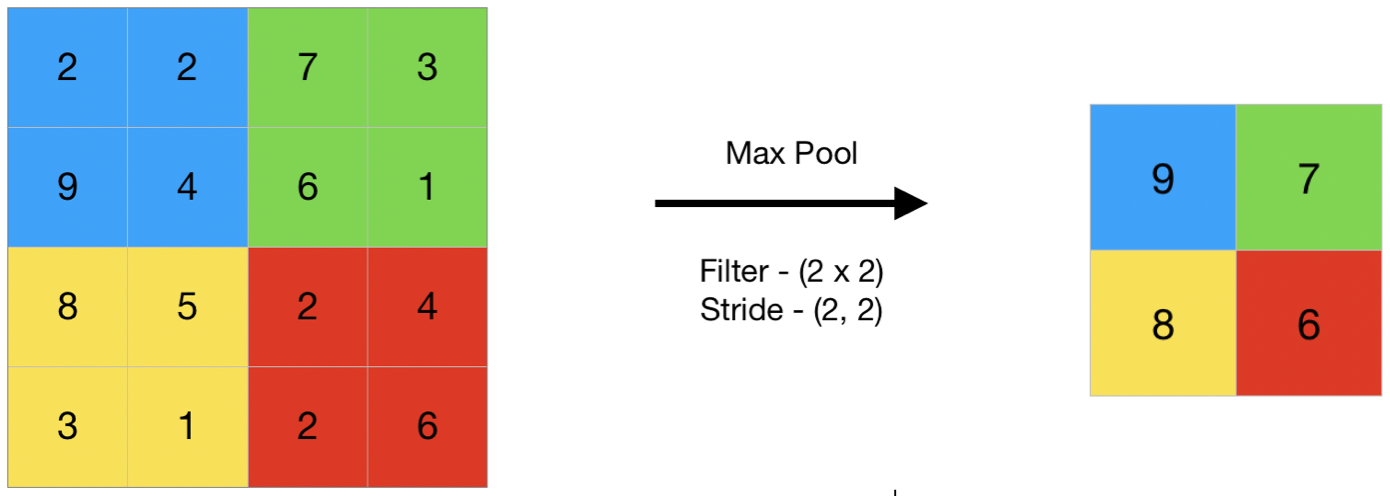

In [21]:
model.add(layers.MaxPooling2D((2, 2)))

In [22]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

şimdi modelin mimarisini gösterelim

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Üstüne Yoğun katmanlar ekleyelim

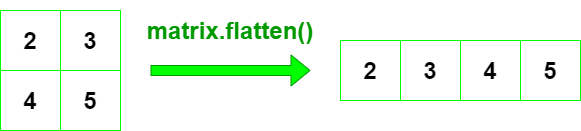

In [25]:
model.add(layers.Flatten())

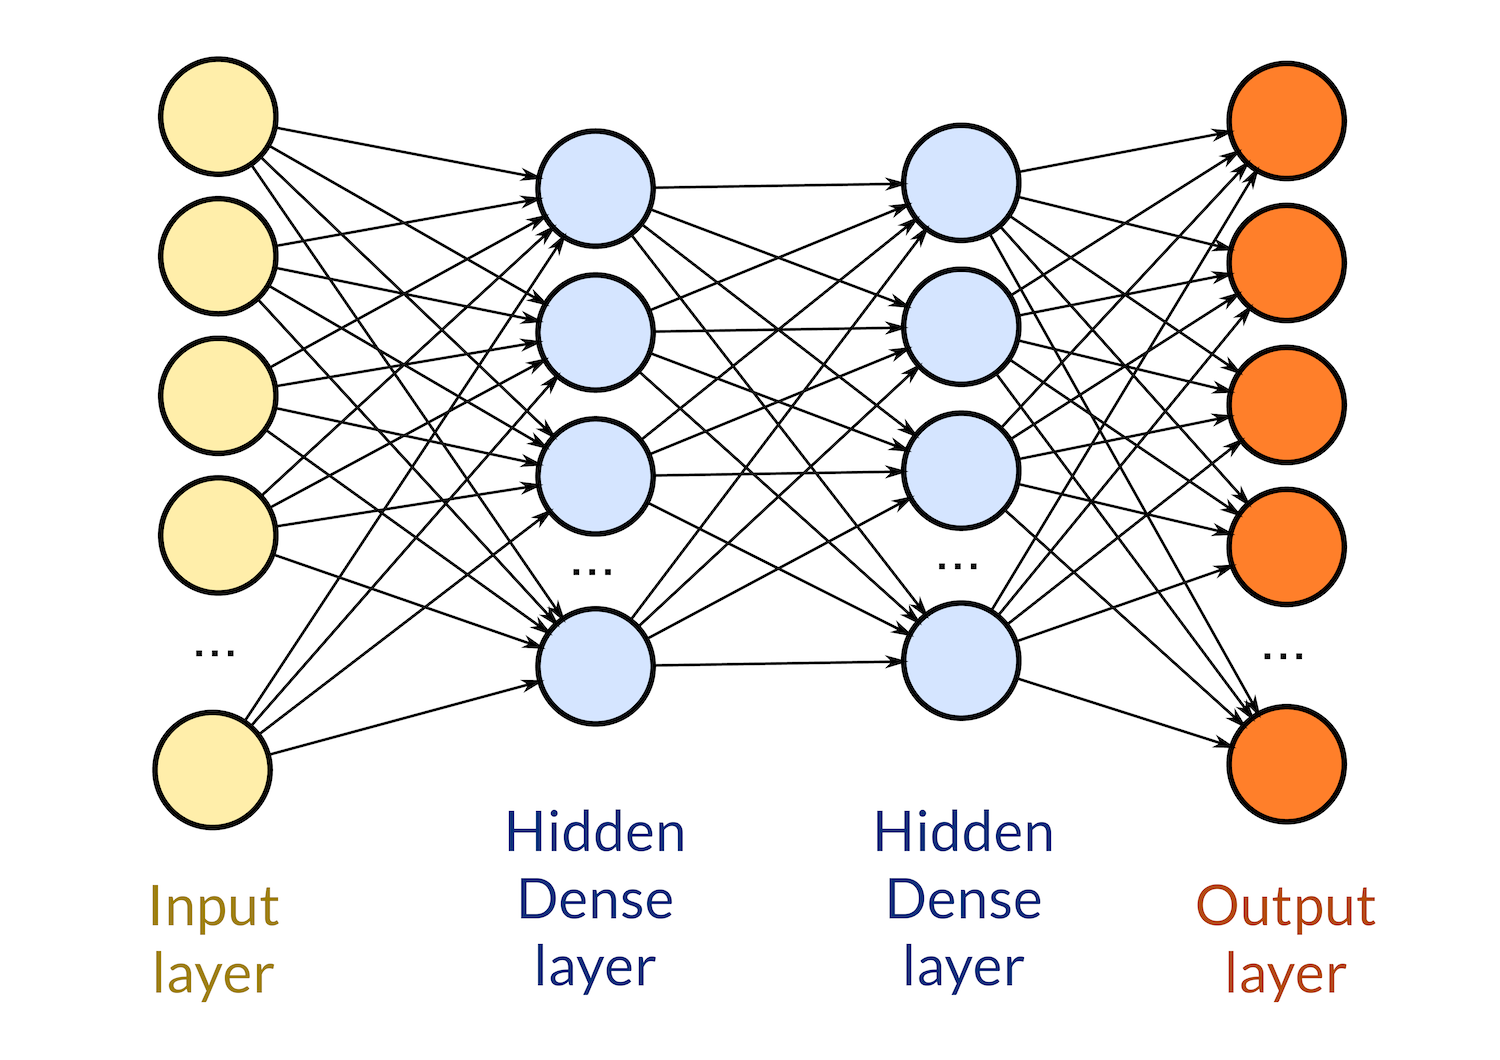

In [26]:
model.add(layers.Dense(64, activation='relu'))

son olarak çıkış katmanını olusturalım data setimimizde toplam 10 adet tür yazılı oldugu için verdiğimiz değer 10 olmaktadır

In [27]:
model.add(layers.Dense(10))

modelimizin son halini görelim

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

Modeli derleyin ve eğitin

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Eğitime başlayalım

In [31]:
hist = model.fit(train_images,train_labels,
          epochs=10,
          validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2106 - accuracy: 0.5698 - val_loss: 1.0948 - val_accuracy: 0.6100
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0235 - accuracy: 0.6405 - val_loss: 0.9675 - val_accuracy: 0.6644
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9093 - accuracy: 0.6830 - val_loss: 0.9973 - val_accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8295 - accuracy: 0.7091 - val_loss: 0.8743 - val_accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7696 - accuracy: 0.7312 - val_loss: 0.8663 - val_accuracy: 0.6975
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7169 - accuracy: 0.7503 - val_loss: 0.8668 - val_accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6765 - accuracy: 0.7634 - val_loss: 0.8525 -

Eğitim tamamlandı modelimizi değerlendirelim

313/313 - 3s - loss: 0.8927 - accuracy: 0.7084


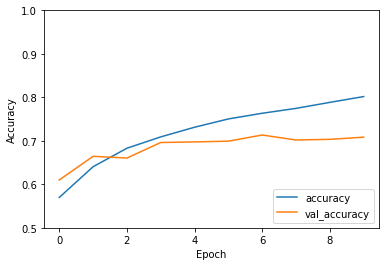

In [32]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8927 - accuracy: 0.7084


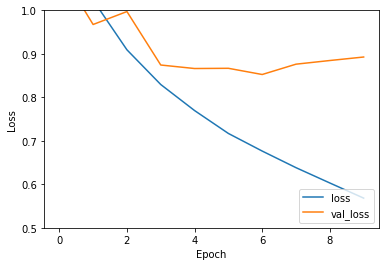

In [33]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)